In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import f1_score, confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'

# 데이터 불러오기

In [3]:
data = pd.read_csv('body_data2.csv')
data.set_index('모델번호', inplace=True)
data

,측정월,측정일,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,성별,나이,신발굽높이,나이대,BMI,체중분류
모델번호,,,,,,,,,,,,,,,,,,,,,
F001,8,10,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,...,9.2,7.8,62.9,32.8,F,37,7.8,30,24.145910,비만
F002,8,10,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,...,9.2,7.0,56.1,31.5,F,26,2.7,20,19.853059,비만
F003,8,10,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,...,9.7,7.6,53.2,25.2,F,39,8.0,30,19.925422,정상체중
F004,8,23,164.1,137.8,83.2,123.3,100.1,75.4,42.4,56.5,...,10.1,7.6,49.4,21.8,F,30,2.5,30,18.344665,정상체중
F005,8,23,152.9,127.7,71.1,111.3,93.8,63.3,37.0,55.7,...,9.1,7.9,51.9,24.2,F,44,1.5,40,22.199970,정상체중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M498,11,30,167.3,141.2,81.4,123.8,98.5,72.4,42.4,54.4,...,9.9,7.9,68.0,15.6,M,58,4.3,50,24.295007,정상체중
M499,11,30,169.9,143.2,81.3,127.9,97.6,69.1,42.4,57.1,...,9.7,8.2,65.2,17.8,M,53,4.5,50,22.587119,정상체중
M500,11,29,173.7,145.3,84.6,128.0,101.5,74.8,44.4,58.2,...,10.1,8.0,67.2,20.3,M,30,2.9,30,22.272534,정상체중


# 인코딩 진행
- 원핫인코딩(OneHotEncoding) 진행

In [4]:
category_features = ['성별', '체중분류']
data_categorical = data[category_features]

encoder = OneHotEncoder()

encode_data = encoder.fit_transform(data_categorical)
df = pd.DataFrame(encode_data.toarray(), columns=encoder.get_feature_names_out(category_features))

data.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True) # 인덱스 재설정
data = pd.concat([data, df], axis=1) 
data

,측정월,측정일,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,...,성별,나이,신발굽높이,나이대,BMI,체중분류,성별_F,성별_M,체중분류_비만,체중분류_정상체중
0,8,10,161.4,136.1,80.1,119.8,94.2,73.2,41.6,55.5,...,F,37,7.8,30,24.145910,비만,1.0,0.0,1.0,0.0
1,8,10,168.1,140.4,84.7,123.3,107.0,77.3,45.2,54.7,...,F,26,2.7,20,19.853059,비만,1.0,0.0,1.0,0.0
2,8,10,163.4,138.2,81.9,120.6,97.1,74.8,42.3,52.0,...,F,39,8.0,30,19.925422,정상체중,1.0,0.0,0.0,1.0
3,8,23,164.1,137.8,83.2,123.3,100.1,75.4,42.4,56.5,...,F,30,2.5,30,18.344665,정상체중,1.0,0.0,0.0,1.0
4,8,23,152.9,127.7,71.1,111.3,93.8,63.3,37.0,55.7,...,F,44,1.5,40,22.199970,정상체중,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,167.3,141.2,81.4,123.8,98.5,72.4,42.4,54.4,...,M,58,4.3,50,24.295007,정상체중,0.0,1.0,0.0,1.0
996,11,30,169.9,143.2,81.3,127.9,97.6,69.1,42.4,57.1,...,M,53,4.5,50,22.587119,정상체중,0.0,1.0,0.0,1.0
997,11,29,173.7,145.3,84.6,128.0,101.5,74.8,44.4,58.2,...,M,30,2.9,30,22.272534,정상체중,0.0,1.0,0.0,1.0
998,9,28,153.4,127.4,78.6,111.5,92.1,68.0,37.4,54.3,...,F,61,6.7,60,22.140479,비만,1.0,0.0,1.0,0.0


In [5]:
data2 = data.drop(columns = ['성별', '체중분류'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정월        1000 non-null   int64  
 1   측정일        1000 non-null   int64  
 2   키          1000 non-null   float64
 3   목뒤높이       1000 non-null   float64
 4   엉덩이높이      1000 non-null   float64
 5   겨드랑높이      1000 non-null   float64
 6   허리높이       1000 non-null   float64
 7   샅높이        1000 non-null   float64
 8   무릎높이       1000 non-null   float64
 9   머리둘레       1000 non-null   float64
 10  목둘레        1000 non-null   float64
 11  젖가슴둘레      1000 non-null   float64
 12  허리둘레       1000 non-null   float64
 13  배꼽수준허리둘레   1000 non-null   float64
 14  엉덩이둘레      1000 non-null   float64
 15  넙다리둘레      1000 non-null   float64
 16  무릎둘레       1000 non-null   float64
 17  장딴지둘레      1000 non-null   float64
 18  종아리최소둘레    1000 non-null   float64
 19  발목둘레       1000 non-null   float64
 20  편위팔둘레    

In [6]:
data['성별_F'] = data['성별_F'].astype('category')
data['성별_M'] = data['성별_M'].astype('category')

data['체중분류_비만'] = data['체중분류_비만'].astype('category')
data['체중분류_정상체중'] = data['체중분류_정상체중'].astype('category')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   측정월        1000 non-null   int64   
 1   측정일        1000 non-null   int64   
 2   키          1000 non-null   float64 
 3   목뒤높이       1000 non-null   float64 
 4   엉덩이높이      1000 non-null   float64 
 5   겨드랑높이      1000 non-null   float64 
 6   허리높이       1000 non-null   float64 
 7   샅높이        1000 non-null   float64 
 8   무릎높이       1000 non-null   float64 
 9   머리둘레       1000 non-null   float64 
 10  목둘레        1000 non-null   float64 
 11  젖가슴둘레      1000 non-null   float64 
 12  허리둘레       1000 non-null   float64 
 13  배꼽수준허리둘레   1000 non-null   float64 
 14  엉덩이둘레      1000 non-null   float64 
 15  넙다리둘레      1000 non-null   float64 
 16  무릎둘레       1000 non-null   float64 
 17  장딴지둘레      1000 non-null   float64 
 18  종아리최소둘레    1000 non-null   float64 
 19  발목둘레       1000 non-null   f

# 스케일링 진행
- z-score로 스케일링 진행(StandardScaler)
- 추가로 사용하지 않을 데이터도 제외하기

In [8]:
numeric_features = data.select_dtypes(include=['float64', 'int64', 'category']).drop(['측정월', '측정일', '체중분류_비만', '체중분류_정상체중'], axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_features.columns)
scaled_data_df.head()

,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,머리둘레,목둘레,젖가슴둘레,...,손바닥직선길이,손안쪽가쪽직선길이,몸무게,체지방율,나이,신발굽높이,나이대,BMI,성별_F,성별_M
0,-0.399298,-0.136372,0.147085,-0.163839,-0.208219,0.222509,-0.295072,-0.561773,0.099775,-0.000249,...,-1.370065,-0.085126,-0.109069,0.618196,-0.733525,3.153040,-0.898537,0.191257,1.0,-1.0
1,0.384855,0.216796,1.123827,0.300671,0.186047,0.981671,0.403415,-1.031484,-0.889537,-0.261221,...,-1.370065,-0.293448,-0.682493,0.433112,-1.455434,-1.078560,-1.556806,-1.127011,1.0,-1.0
2,-0.165222,0.036105,0.529288,-0.057666,-0.118893,0.518767,-0.159255,-2.616756,-1.267803,-0.758310,...,-0.582490,-0.137206,-0.927042,-0.463836,-0.602269,3.318985,-0.898537,-1.104789,1.0,-1.0
3,-0.083296,0.003252,0.805324,0.300671,-0.026487,0.629864,-0.139853,0.025364,-1.413290,-1.255400,...,0.047569,-0.137206,-1.247485,-0.947903,-1.192922,-1.244505,-0.898537,-1.590215,1.0,-1.0
4,-1.394118,-0.826283,-1.763933,-1.291935,-0.220540,-1.610591,-1.187584,-0.444346,-0.802245,-1.255400,...,-1.527579,-0.059085,-1.036667,-0.606208,-0.274129,-2.074231,-0.240268,-0.406311,1.0,-1.0


# 데이터 분할
- train_test_split 으로 진행

In [9]:
X = scaled_data_df.drop(columns=['BMI', '몸무게', '체지방율'])
y = data['체중분류_비만']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# 영향을 제일 많이 끼치는 변수 5개를 SFS 함수로 고르기
- 나중에 머신러닝이 골라주는 변수 5개와 우리가 중요하게 생각한 변수 5개를 평가지표로 비교할 것

In [28]:
classifier_list = []

classifier_list.append(SVC(probability=True, random_state=42))
classifier_list.append(KNeighborsClassifier())
classifier_list.append(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))

In [29]:
# 중요한 변수 5개만 뽑기
def Select5Feature(model, xtrain, ytrain):
    sfs_result = []
    sfs_list = []
    
    sfs = SFS(model, 
              k_features=5,
              forward=True, 
              floating=False, 
              verbose=2,
              scoring='accuracy',
              cv=5)
    
    sfs = sfs.fit(xtrain, ytrain)

    return sfs

# 모델 학습 시키기
def model_fit(model, xtrain, ytrain):
    model_fit = model.fit(xtrain, ytrain)
    
    return model_fit

In [30]:
SVC_5_feature = Select5Feature(classifier_list[0], X_train, y_train)
KNN_5_feature = Select5Feature(classifier_list[1], X_train, y_train)
XGB_5_feature = Select5Feature(classifier_list[2], X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:   11.1s finished

[2024-02-21 00:23:41] Features: 1/5 -- score: 0.76375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    6.9s finished

[2024-02-21 00:23:48] Features: 2/5 -- score: 0.79375[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    6.3s finished

[2024-02-21 00:23:55] Features: 3/5 -- score: 0.8074999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 

In [31]:
print(list(SVC_5_feature.k_feature_names_))
print(list(KNN_5_feature.k_feature_names_))
print(list(XGB_5_feature.k_feature_names_))

['허리둘레', '배꼽수준허리둘레', '무릎둘레', '편팔꿈치둘레', '손직선길이']
['겨드랑높이', '허리높이', '샅높이', '배꼽수준허리둘레', '손안쪽가쪽직선길이']
['배꼽수준허리둘레', '넙다리둘레', '종아리최소둘레', '발목둘레', '발너비']


In [32]:
SVC_5_model_fit = model_fit(classifier_list[0], X_train[list(SVC_5_feature.k_feature_names_)], y_train)
KNN_5_model_fit = model_fit(classifier_list[1], X_train[list(KNN_5_feature.k_feature_names_)], y_train)
XGB_5_model_fit = model_fit(classifier_list[2], X_train[list(XGB_5_feature.k_feature_names_)], y_train)

# 평가지표 함수
- f1_score
- accuracy_score(정확도)
- precision_score(정밀도)
- recall_score(재현율)

In [33]:
Classifier_name = ['SVM', 'KNN', 'XGB']
feature_name = ['비만', '정상체중']

# 평가지표 : F1 Score
def fit_score(model, xtest, ytest):
    f1_lst = []
    
    y_pred = model.predict(xtest)
    
    f1 = f1_score(ytest, y_pred)
    accuracy_ = accuracy_score(ytest, y_pred)
    precision_ = precision_score(ytest, y_pred)
    recall_ = recall_score(ytest, y_pred)
    
    return f1, accuracy_, precision_, recall_

In [34]:
SVC_f1, SVC_accuracy, SVC_precision, SVC_recall = fit_score(SVC_5_model_fit, X_test[list(SVC_5_feature.k_feature_names_)], y_test)
KNN_f1, KNN_accuracy, KNN_precision, KNN_recall = fit_score(KNN_5_model_fit, X_test[list(KNN_5_feature.k_feature_names_)], y_test)
XGB_f1, XGB_accuracy, XGB_precision, XGB_recall = fit_score(XGB_5_model_fit, X_test[list(XGB_5_feature.k_feature_names_)], y_test)

# SVC, KNN, XGB 순으로 평가지표 점수 리스트 작성
sfs_f1_list = [SVC_f1, KNN_f1, XGB_f1]
sfs_accuracy_list = [SVC_accuracy, KNN_accuracy, XGB_accuracy]
sfs_precision_list = [SVC_precision, KNN_precision, XGB_precision]
sfs_recall_list = [SVC_recall, KNN_recall, XGB_recall]

print(sfs_f1_list)
print(sfs_accuracy_list)
print(sfs_precision_list)
print(sfs_recall_list)

[0.8326180257510729, 0.8051948051948051, 0.7665198237885462]
[0.805, 0.775, 0.735]
[0.8290598290598291, 0.808695652173913, 0.7837837837837838]
[0.8362068965517241, 0.8017241379310345, 0.75]


# 각 평가지표 별 시각화 진행
- x축을 모델로, y축을 점수로 진행

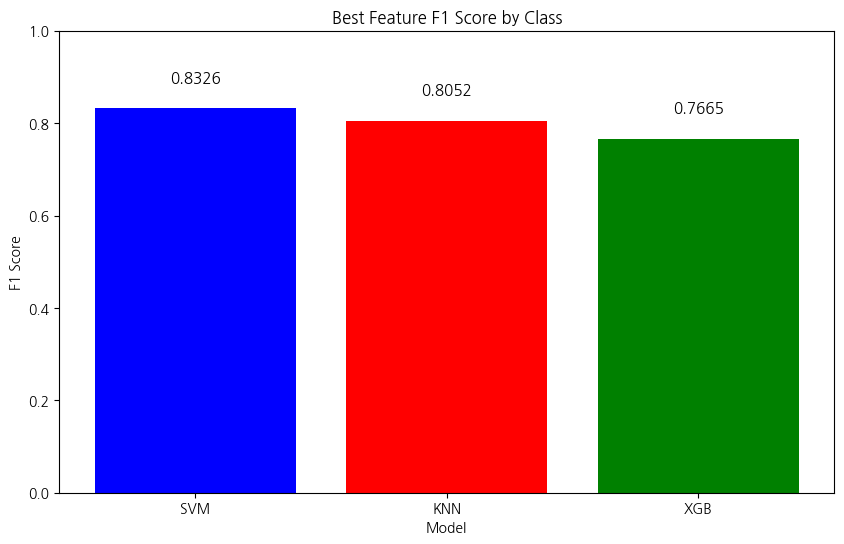

In [36]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, sfs_f1_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, sfs_f1_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature F1 Score by Class')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

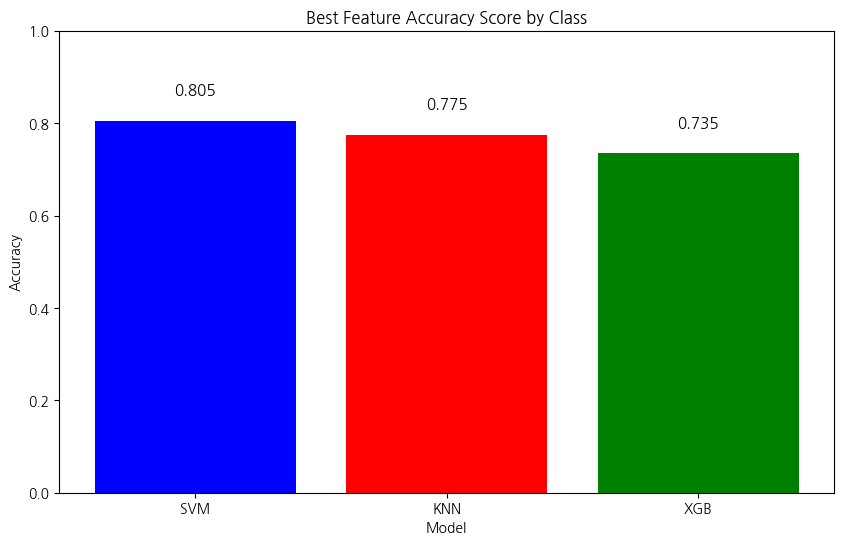

In [37]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, sfs_accuracy_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, sfs_accuracy_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Accuracy Score by Class')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

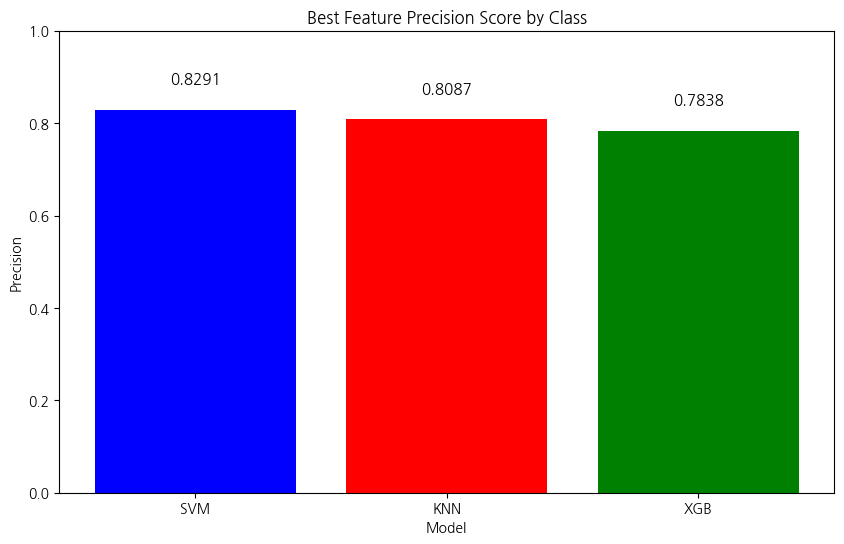

In [38]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, sfs_precision_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, sfs_precision_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Precision Score by Class')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

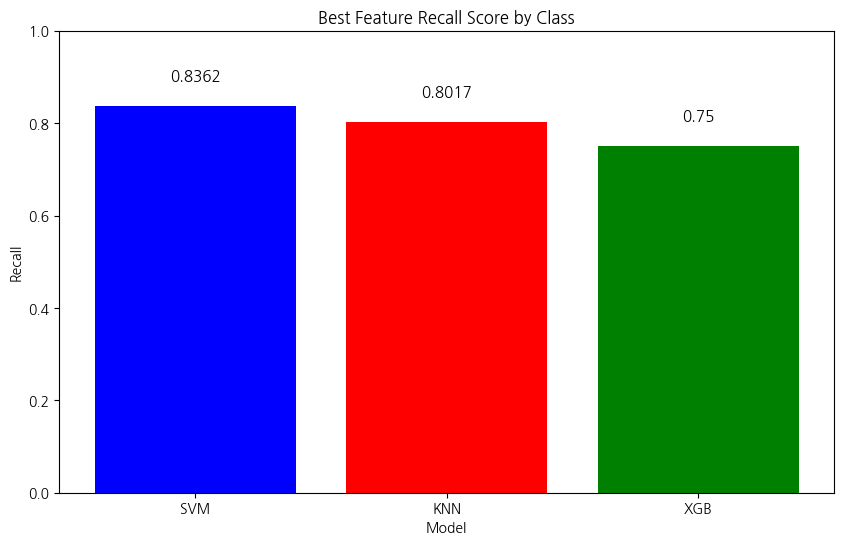

In [39]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, sfs_recall_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, sfs_recall_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Recall Score by Class')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

# 우리가 생각한 주요 피처들
- '젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F'

In [40]:
feature = ['젖가슴둘레', '허리둘레', '넙다리둘레', '엉덩이둘레', '성별_F']

In [41]:
X = scaled_data_df[feature]
y = data['체중분류_비만']

In [42]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.2,
                                                random_state=42)

In [43]:
model_SVC = classifier_list[0].fit(X_train, y_train)
model_KNN = classifier_list[1].fit(X_train, y_train)
model_XGB = classifier_list[2].fit(X_train, y_train)

In [44]:
SVC_5_f1, SVC_5_accuracy, SVC_5_precision, SVC_5_recall = fit_score(model_SVC, X_test, y_test)
KNN_5_f1, KNN_5_accuracy, KNN_5_precision, KNN_5_recall = fit_score(model_KNN, X_test, y_test)
XGB_5_f1, XGB_5_accuracy, XGB_5_precision, XGB_5_recall = fit_score(model_XGB, X_test, y_test)

# SVC, KNN, XGB 순으로 평가지표 점수 리스트 작성
f1_list = [SVC_5_f1, KNN_5_f1, XGB_5_f1]
accuracy_list = [SVC_5_accuracy, KNN_5_accuracy, XGB_5_accuracy]
precision_list = [SVC_5_precision, KNN_5_precision, XGB_5_precision]
recall_list = [SVC_5_recall, KNN_5_recall, XGB_5_recall]

print(f1_list)
print(accuracy_list)
print(precision_list)
print(recall_list)

[0.823529411764706, 0.7863247863247863, 0.8326180257510729]
[0.79, 0.75, 0.805]
[0.8032786885245902, 0.7796610169491526, 0.8290598290598291]
[0.8448275862068966, 0.7931034482758621, 0.8362068965517241]


# 각 평가지표 별 시각화 진행
- x축을 모델로, y축을 점수로 진행

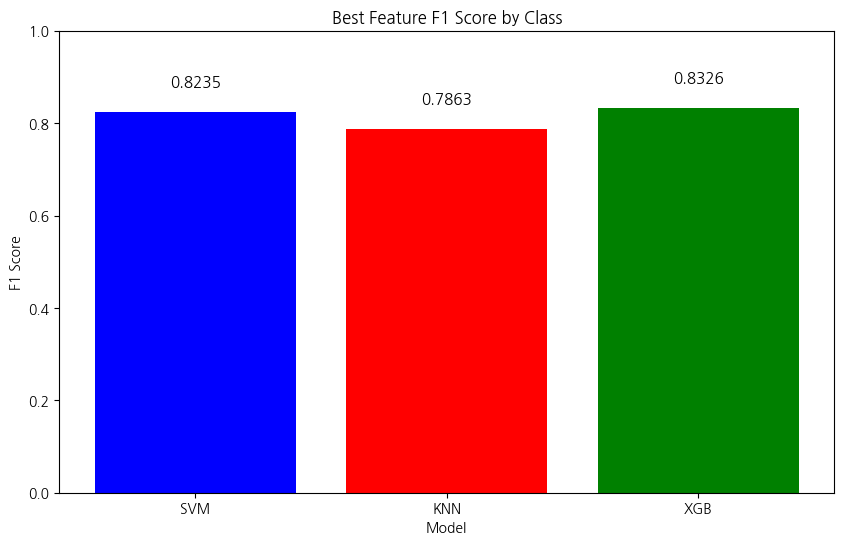

In [45]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, f1_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, f1_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature F1 Score by Class')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

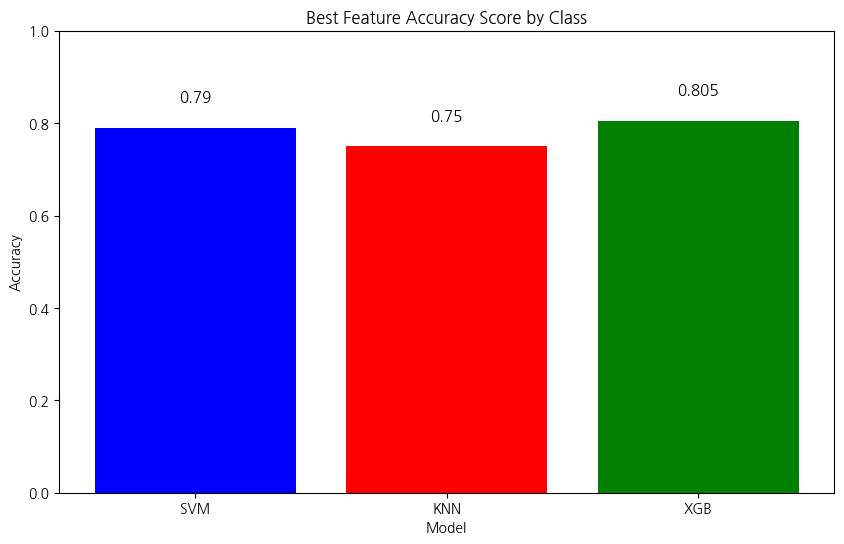

In [46]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, accuracy_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, accuracy_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Accuracy Score by Class')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

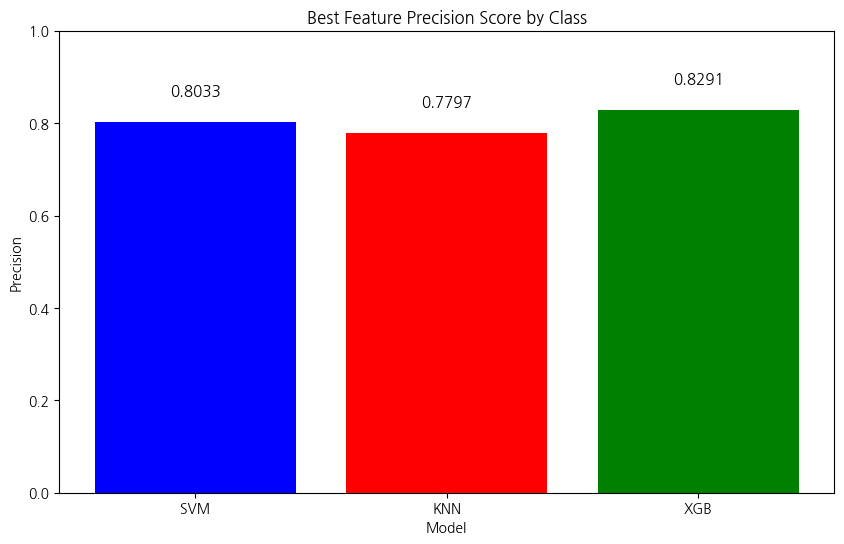

In [47]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, precision_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, precision_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Precision Score by Class')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

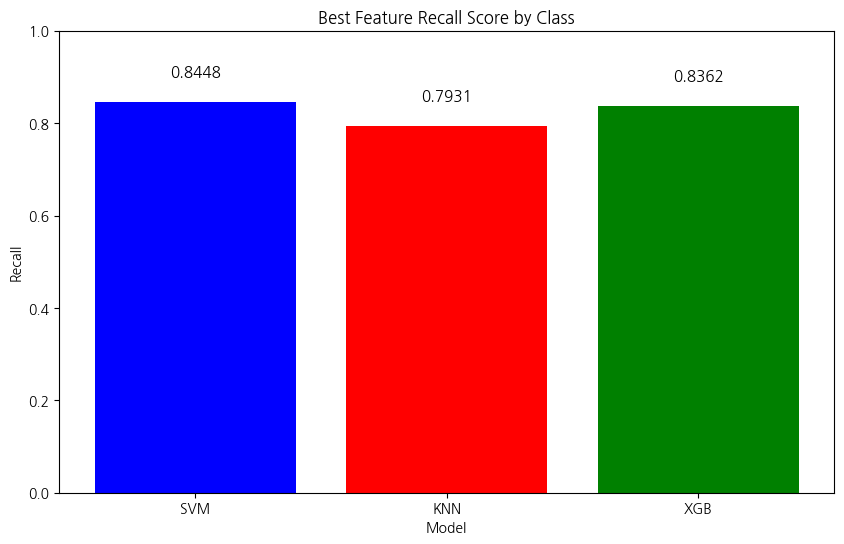

In [48]:
plt.figure(figsize=(10, 6))
bars = plt.bar(Classifier_name, recall_list, color=['blue', 'red', 'green'])
for bar, score in zip(bars, recall_list):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(score, 4), ha='center', va='bottom', fontsize = 11)

plt.title('Best Feature Recall Score by Class')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)  # F1 스코어의 가능한 범위는 0에서 1
plt.show()

# 비교하기

In [49]:
evaluation_metrics_sfs = {
    'F1 Score': {'SVM': sfs_f1_list[0], 'KNN': sfs_f1_list[1], 'XGB': sfs_f1_list[2]},
    'Accuracy': {'SVM': sfs_accuracy_list[0], 'KNN': sfs_accuracy_list[1], 'XGB': sfs_accuracy_list[2]},
    'Precision': {'SVM': sfs_precision_list[0], 'KNN': sfs_precision_list[1], 'XGB': sfs_precision_list[2]},
    'Recall': {'SVM': sfs_recall_list[0], 'KNN': sfs_recall_list[1], 'XGB': sfs_recall_list[2]}
}
evaluation_metrics_5 = {
    'F1 Score': {'SVM': f1_list[0], 'KNN': f1_list[1], 'XGB': f1_list[2]},
    'Accuracy': {'SVM': accuracy_list[0], 'KNN': accuracy_list[1], 'XGB': accuracy_list[2]},
    'Precision': {'SVM': precision_list[0], 'KNN': precision_list[1], 'XGB': precision_list[2]},
    'Recall': {'SVM': recall_list[0], 'KNN': recall_list[1], 'XGB': recall_list[2]}
}

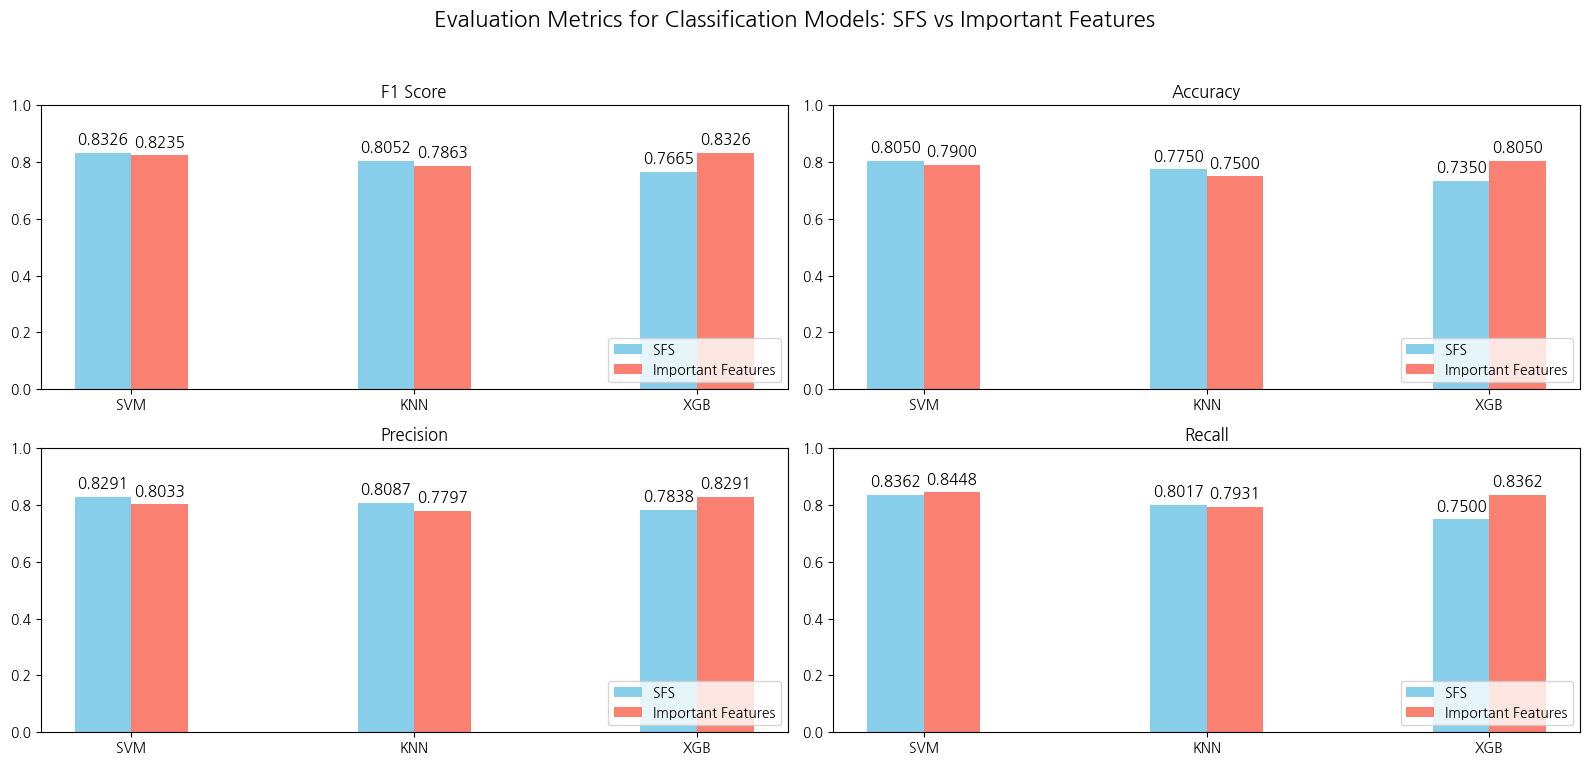

In [50]:
# 시각화 코드 작성
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
axs = axs.ravel()  # 2x2 배열을 1차원 배열로 변환

models = ['SVM', 'KNN', 'XGB']
metrics_name = ['F1 Score', 'Accuracy', 'Precision', 'Recall']

# 각 평가 지표에 대한 서브플롯 생성
for idx, metric in enumerate(metrics_name):
    ax = axs[idx]
    x_positions = np.arange(len(models)) * 2  # X축 위치 조정
    sfs_scores = [evaluation_metrics_sfs[metric][model] for model in models]  # SFS 점수
    scores_5 = [evaluation_metrics_5[metric][model] for model in models]  # 5개 특성 점수
    
    # SFS 시나리오 막대 그리기
    ax.bar(x_positions - 0.4, sfs_scores, width=0.4, label='SFS', color='skyblue', align='center')
    # 5개 특성 시나리오 막대 그리기
    ax.bar(x_positions, scores_5, width=0.4, label='Important Features', color='salmon', align='center')
    
    ax.set_xticks(x_positions - 0.2)  # X축 눈금 위치 조정
    ax.set_xticklabels(models)
    ax.set_title(metric)
    ax.set_ylim(0, 1)  # 점수의 범위를 0에서 1로 설정
    ax.set
    
    # 막대 위에 점수 표시
    for i, (sfs_score, score_5) in enumerate(zip(sfs_scores, scores_5)):
        ax.text(i * 2 - 0.4, sfs_score + 0.02, f'{sfs_score:.4f}', ha='center', va='bottom', fontsize= 11)
        ax.text(i * 2, score_5 + 0.02, f'{score_5:.4f}', ha='center', va='bottom', fontsize= 11)

    ax.legend(loc = 'lower right')

plt.suptitle('Evaluation Metrics for Classification Models: SFS vs Important Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
